# 오늘의 과제

1. 보스턴하우스프라이스 boston house price


In [21]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# 이 집값 데이터를 분석하여 regression의 결과를 그래프나 숫자나 글로 표현하라.
# target : 집값
# data : 집값에 미치는 여러 요소들.

boston = load_boston()
# print(type(boston))
# print(boston.keys())
# print(boston.feature_names)

In [51]:
X = boston.data
y = boston.target

In [54]:
reg=LinearRegression()
lasso_reg=Lasso(alpha=5)
ridge_reg=Ridge(alpha=8)

In [55]:
reg.fit(X,y)
lasso_reg.fit(X,y)
ridge_reg.fit(X,y)

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [56]:
for a, b in zip(boston.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

CRIM: -0.108011
ZN: 0.046420
INDUS: 0.020559
CHAS: 2.686734
NOX: -17.766611
RM: 3.809865
AGE: 0.000692
DIS: -1.475567
RAD: 0.306049
TAX: -0.012335
PTRATIO: -0.952747
B: 0.009312
LSTAT: -0.524758


In [29]:
for a, b in zip(boston.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

CRIM: -0.000000
ZN: 0.038467
INDUS: -0.000000
CHAS: 0.000000
NOX: 0.000000
RM: 0.000000
AGE: 0.031679
DIS: -0.000000
RAD: 0.000000
TAX: -0.007669
PTRATIO: -0.000000
B: 0.006286
LSTAT: -0.747258


In [30]:
for a, b in zip(boston.feature_names, ridge_reg.coef_):
    print("%s: %f" %(a,b))

CRIM: -0.101482
ZN: 0.049297
INDUS: -0.041057
CHAS: 2.053009
NOX: -2.869174
RM: 3.747762
AGE: -0.010751
DIS: -1.256365
RAD: 0.278809
TAX: -0.013867
PTRATIO: -0.800300
B: 0.010030
LSTAT: -0.555081


In [57]:
reg.score(X,y) # regression 하면 score한 값이 1에 가까울 수록 fitting이 실제값에 가깝다.

0.7406426641094095

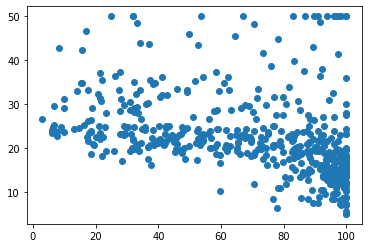

In [59]:
import matplotlib.pyplot as plt
X1=[i[6] for i in X]
plt.scatter(X1,y)

# AGE : 1940년 이전에 건축된 소유주택의 비율과 주택가격과의 관계

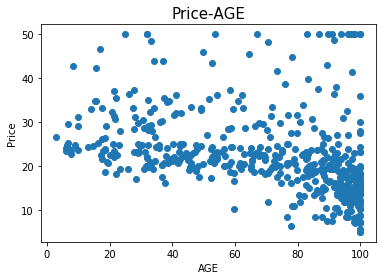

In [75]:
X2=[i[6] for i in X]
plt.title('Price-AGE',size=15)
plt.xlabel('AGE')
plt.ylabel('Price')
plt.plot(X2,y,'o')

## AGE의 회귀

In [71]:
model_linear = LinearRegression().fit(boston.data[:,6].reshape(-1,1),boston.target)

Text(0, 0.5, 'Price')

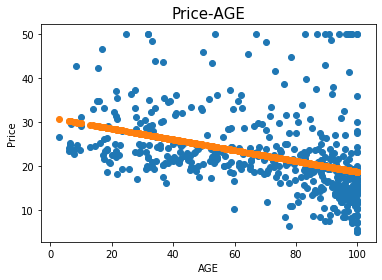

In [74]:
plt.scatter(boston.data[:,6],boston.target)
plt.scatter(boston.data[:,6],model_linear.predict(boston.data[:,6].reshape(-1,1)))
plt.title('Price-AGE',size=15)
plt.xlabel('AGE')
plt.ylabel('Price')

In [79]:
model_linear.score(boston.data[:,6].reshape(-1,1),boston.target)

0.14209474407780442

Text(0, 0.5, 'Price')

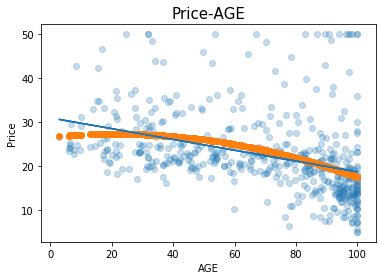

In [113]:
poly_2 = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(boston.data[:,6].reshape(-1,1))
 
model_2_poly = LinearRegression().fit(poly_2_X,boston.target)
plt.scatter(boston.data[:,6],boston.target,alpha=0.25)
 
linear_fit = plt.plot(boston.data[:,6], model_linear.predict(boston.data[:,6].reshape(-1,1)))
poly_2_fit = plt.scatter(boston.data[:,6], model_2_poly.predict(poly_2_X))
plt.title('Price-AGE',size=15)
plt.xlabel('AGE')
plt.ylabel('Price')

In [83]:
model_2_poly.score(poly_2_X,boston.target)

0.15483561609351715

Text(0, 0.5, 'Price')

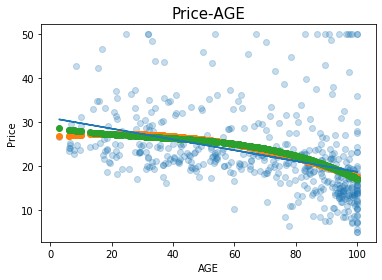

In [112]:
poly_3 = PolynomialFeatures(degree=3)
poly_3_X = poly_3.fit_transform(boston.data[:,6].reshape(-1,1))
 
model_3_poly = LinearRegression().fit(poly_3_X,boston.target)
plt.scatter(boston.data[:,6],boston.target,alpha=0.25)
 
linear_fit = plt.plot(boston.data[:,6], model_linear.predict(boston.data[:,6].reshape(-1,1)))
poly_2_fit = plt.scatter(boston.data[:,6], model_2_poly.predict(poly_2_X))
poly_3_fit = plt.scatter(boston.data[:,6], model_3_poly.predict(poly_3_X))
plt.title('Price-AGE',size=15)
plt.xlabel('AGE')
plt.ylabel('Price')

In [85]:
model_3_poly.score(poly_3_X,boston.target)

0.15657302205435297

Text(0, 0.5, 'Price')

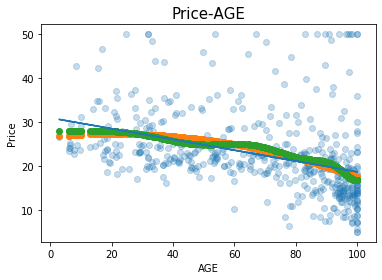

In [111]:
poly_12 = PolynomialFeatures(degree=12)
poly_12_X = poly_12.fit_transform(boston.data[:,6].reshape(-1,1))
 
model_12_poly = LinearRegression().fit(poly_12_X,boston.target)
plt.scatter(boston.data[:,6],boston.target,alpha=0.25)
 
linear_fit = plt.plot(boston.data[:,6], model_linear.predict(boston.data[:,6].reshape(-1,1)))
poly_2_fit = plt.scatter(boston.data[:,6], model_2_poly.predict(poly_2_X))
poly_12_fit = plt.scatter(boston.data[:,6], model_12_poly.predict(poly_12_X))
plt.title('Price-AGE',size=15)
plt.xlabel('AGE')
plt.ylabel('Price')

In [110]:
model_12_poly.score(poly_12_X,boston.target)

0.1603424810010723

## degree = 12에서 가장 높은 score가 나온다.
## -> AGE에 따른 집값은 12차 함수의 모양과 비례해 감소한다.